In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [341]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [226]:
# set configurations for number of samples
sample_size = 500
nr_sample = 20

In [227]:
bounded_dists = dm.get_bounded_distribution()
bounded_dists

{'arcsine': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8d62d160>,
 'beta_1_2': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8d9b0670>,
 'powerlaw_0.3': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8d9b0190>,
 'trapezoid_0.3_0.8': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8da1b400>,
 'traing_0.3': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8da1bdc0>,
 'uniform': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8da1bc70>}

In [274]:
x = np.linspace(0,1,500)
edf_df = dem.get_edf(bounded_dists, nr_sample, sample_size, x)
edf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,dist
0,0.0,0.032,0.050,0.062,0.066,0.074,0.084,0.084,0.088,0.090,...,0.942,0.944,0.948,0.956,0.962,0.964,0.968,0.980,1.0,arcsine
1,0.0,0.046,0.056,0.058,0.066,0.068,0.076,0.080,0.086,0.092,...,0.910,0.918,0.924,0.932,0.936,0.948,0.954,0.970,1.0,arcsine
2,0.0,0.028,0.044,0.050,0.054,0.062,0.064,0.066,0.068,0.072,...,0.918,0.920,0.920,0.930,0.946,0.950,0.952,0.970,1.0,arcsine
3,0.0,0.038,0.048,0.060,0.066,0.074,0.082,0.082,0.082,0.086,...,0.906,0.924,0.928,0.934,0.944,0.956,0.964,0.972,1.0,arcsine
4,0.0,0.032,0.046,0.060,0.066,0.082,0.092,0.096,0.104,0.112,...,0.928,0.936,0.938,0.940,0.944,0.952,0.954,0.964,1.0,arcsine


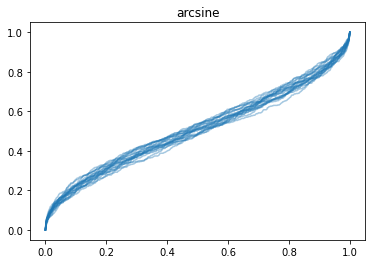

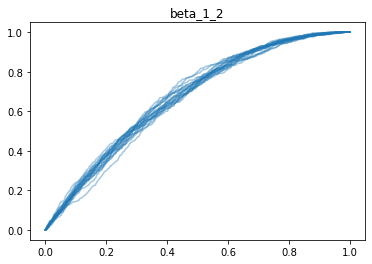

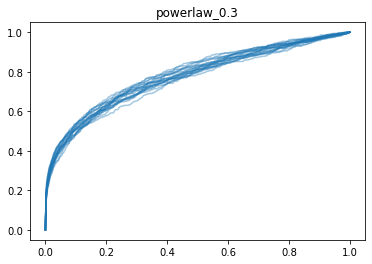

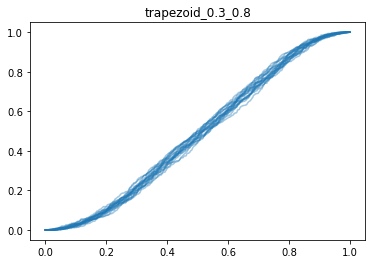

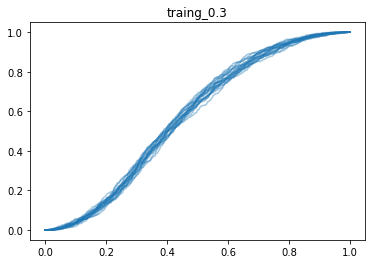

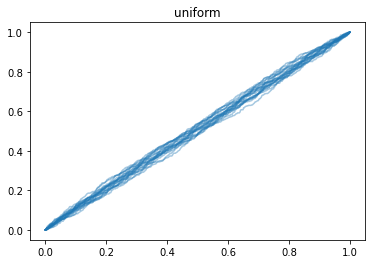

In [229]:
dem.get_edf_plot(bounded_dists, edf_df, nr_sample, sample_size, x)

In [230]:
longtail_dists = dm.get_longtail_distribution()
longtail_dists

{'cauchy': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8dc02fd0>,
 'lognorm_1.5': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8da79c40>,
 'pareto_1.5': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8d73abe0>,
 'weibull_min_0.4': <scipy.stats._distn_infrastructure.rv_frozen at 0x22e8d7c9f70>}

In [260]:
x = np.linspace(0,20,500)
edf_df = dem.get_edf(longtail_dists, nr_sample, sample_size, x)
edf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,dist
0,0.0,0.032,0.064,0.084,0.116,0.140,0.166,0.186,0.212,0.230,...,0.978,0.978,0.978,0.978,0.978,0.978,0.978,0.978,0.978,cauchy
1,0.0,0.040,0.058,0.080,0.110,0.136,0.152,0.184,0.206,0.230,...,0.964,0.964,0.964,0.964,0.964,0.964,0.964,0.964,0.964,cauchy
2,0.0,0.028,0.050,0.066,0.080,0.108,0.136,0.154,0.180,0.214,...,0.960,0.960,0.960,0.962,0.962,0.964,0.964,0.964,0.964,cauchy
3,0.0,0.032,0.062,0.082,0.104,0.126,0.164,0.184,0.218,0.234,...,0.970,0.970,0.970,0.970,0.970,0.970,0.970,0.970,0.970,cauchy
4,0.0,0.032,0.062,0.098,0.128,0.148,0.164,0.188,0.212,0.242,...,0.962,0.962,0.962,0.962,0.962,0.962,0.962,0.962,0.962,cauchy


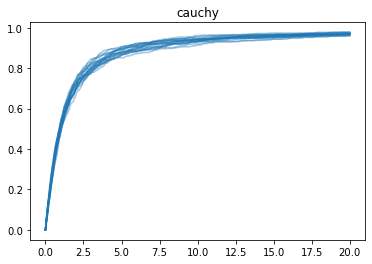

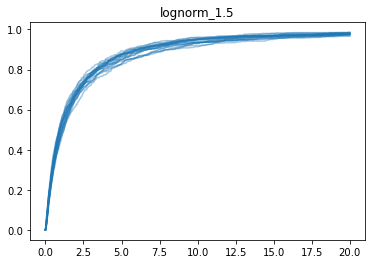

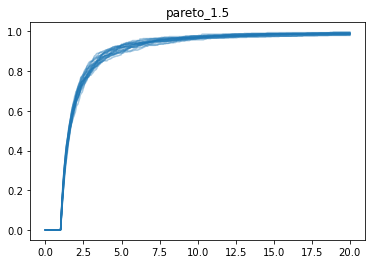

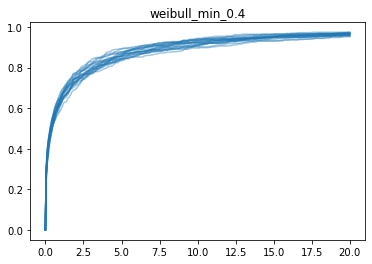

In [232]:
dem.get_edf_plot(longtail_dists, edf_df, nr_sample, sample_size, x)

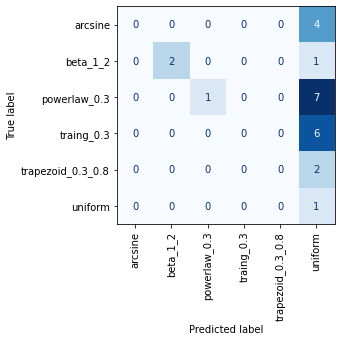

(0.32421052631578945,
 array([0.2       , 0.26315789, 0.42105263, 0.26315789, 0.47368421]))

In [344]:
cm.svm_model(edf_df, 0.2, 5)

In [342]:
X, y, X_train, X_test, y_train, y_test = cm.prepare_data(edf_df, 0.2)

In [343]:
cross_val_score(clf_svm, X, y, cv=5)

array([1., 1., 1., 1., 1.])

In [321]:
param_grid = [{'C':np.logspace(0,1,10),'gamma':np.logspace(0,1,10), 'kernel':['rbf']},]
optimal_params = GridSearchCV(SVC(), param_grid, cv=5, verbose=0)
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 1.2915496650148839, 'gamma': 1.0, 'kernel': 'rbf'}


In [322]:
print(optimal_params.best_score_)

0.32421052631578945


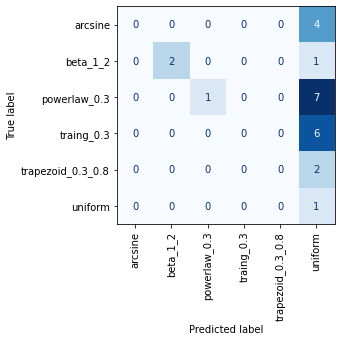

In [337]:
clf_svm = SVC(random_state=10, C=optimal_params.best_params_['C'], gamma=optimal_params.best_params_['gamma'])
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(c_matrix, display_labels=clf_svm.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False, xticks_rotation='vertical')
plt.show()

In [339]:
scores = cross_val_score(clf_svm, X_train, y_train, cv=5)
accuracy = scores.mean()

accuracy

0.32421052631578945